In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, M_sun
from plotting_setup import *

import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, dist, calc_ang
from pipeline_2D import to_osyris_ivs
from pipeline_streamers import phi_average

In [2]:
data = pipeline(snap = 362, run = 'sink13fmr05', sink_id=13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:05<00:00, 745.44it/s]


In [3]:
data.recalc_L(), data.calc_trans_xyz()

Converged mean angular momentum vector after 1 iteration(s)
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:01<00:00, 3300.00it/s]


(None, None)

/lustre/hpc/astro/kxm508/codes/python_dispatch/plot_production_ipynb/../pipeline_scripts/pipeline_streamers.py:193: RuntimeWarning: invalid value encountered in true_divide
  hist_ρ = hist_mass * self.sn.scaling.m / (hist_vol * self.sn.scaling.l ** 3)
/lustre/hpc/astro/kxm508/codes/python_dispatch/plot_production_ipynb/../pipeline_scripts/pipeline_streamers.py:236: RuntimeWarning: invalid value encountered in true_divide
  hist_val /= weight_hist


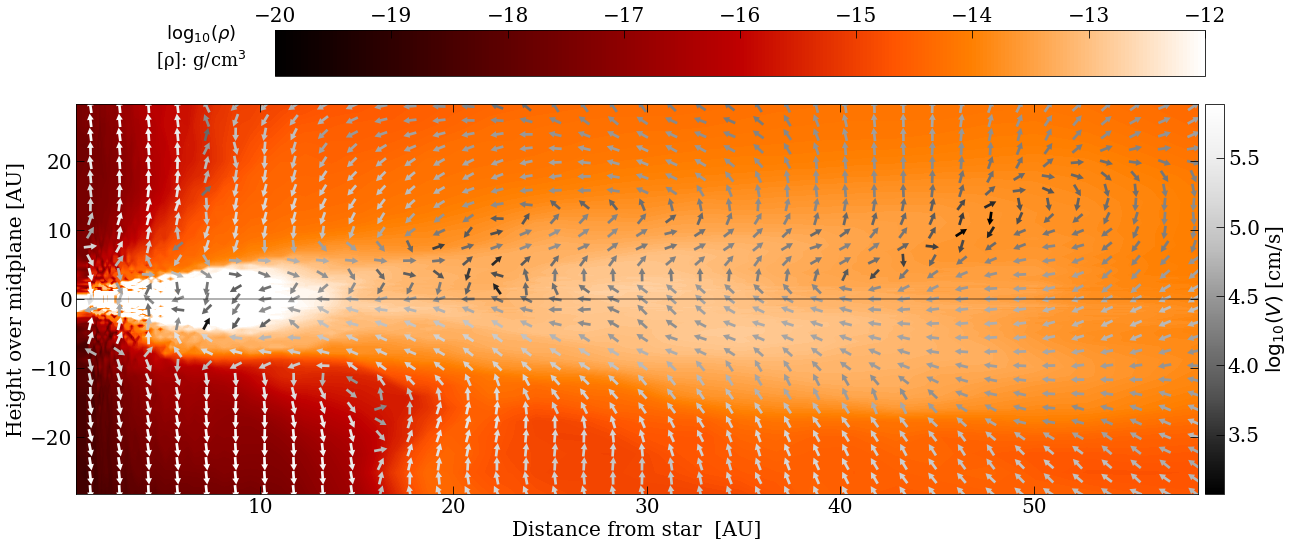

In [76]:
E_kin = 'd * (ux**2 + uy**2 + uz**2)'
variable = ['bx**2 + by**2 + bz**2', 'P', E_kin]; variable_W = ['volume', 'mass', 'mass']
azimuthal_avg = data.phi_average(variables = variable,  variables_weight = variable_W, height=30, radius=60, quiver_dens=0.5)

In [77]:
β = azimuthal_avg['P'] * data.cgs_pressure / (azimuthal_avg['bx**2 + by**2 + bz**2'] * data.sn.scaling.b**2 / (8 * np.pi))
Alfven = azimuthal_avg[E_kin] * data.cgs_pressure - (azimuthal_avg['bx**2 + by**2 + bz**2'] * data.sn.scaling.b**2 / (8 * np.pi))

In [80]:
Alfven.shape

(80, 60)

In [48]:
R_bins = azimuthal_avg['r_bins'] * data.au_length
z_bins = azimuthal_avg['z_bins'] * data.au_length
xx, yy = np.meshgrid(R_bins, z_bins)

rr_v = azimuthal_avg['quiver_r_bins'] * data.au_length
zz_v = azimuthal_avg['quiver_z_bins'] * data.au_length

hist_vr = azimuthal_avg['hist_vr'] 
hist_vz = azimuthal_avg['hist_vz'] 
norm_vel = azimuthal_avg['arrow_length'] * data.cms_velocity
quiver_dens = 0.5

/tmp/ipykernel_2022769/270755235.py:7: UserWarning: The following kwargs were not used by contour: 'ls'
  ct = axs.contour(xx, yy, np.log10(β.T), [np.log10(1)], linewidths = [3], colors = ['black'], alpha = 0.6, ls = ['-'])
/tmp/ipykernel_2022769/270755235.py:8: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  axs.contour(xx, yy, Alfven.T, [0], linewidths = [3], colors = ['green'], ls = ['-'], label = '')


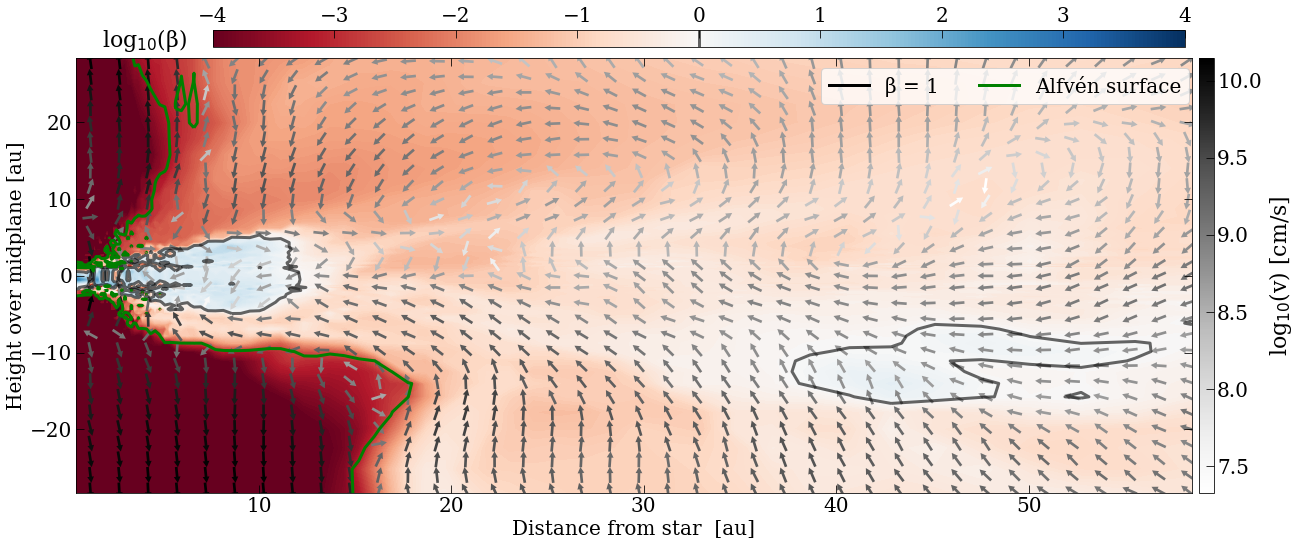

In [118]:
log_vmin=-4; log_vmax=4

fig, axs = plt.subplots(figsize=(20, 8))
axs.set(ylabel='Height over midplane [au]', xlabel='Distance from star  [au]')

cs = axs.contourf((R_bins), (z_bins), (np.log10(β.T)), origin='lower', levels=200, cmap='RdBu', vmin=log_vmin, vmax=log_vmax)
ct = axs.contour(xx, yy, np.log10(β.T), [np.log10(1)], linewidths = [3], colors = ['black'], alpha = 0.6, ls = ['-'])
axs.contour(xx, yy, Alfven.T, [0], linewidths = [3], colors = ['green'], ls = ['-'], label = '')


cbaxes_top = fig.add_axes([0.22, 0.9, 0.675, 0.03])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap), cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log$_{10}$(β)', labelpad = -40, x = -0.07, rotation = 0, fontsize = 22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')

cbar_top.add_lines(ct)

quiver = axs.quiver(rr_v, zz_v , hist_vr, hist_vz, np.log10(norm_vel), cmap=(mpl.cm.Greys),
            headwidth=2.5,
            headaxislength=2.3,
            headlength=2.3,
            pivot='mid',
            scale=70)

cbaxes_side = fig.add_axes([0.905, 0.125, 0.01, 0.755])
cbar_vel = fig.colorbar(quiver, cax = cbaxes_side)
cbar_vel.set_label('log$_{10}$(v) [cm/s]', labelpad = 5, fontsize = 22)

legend_elements = [ Line2D([0], [0], color = 'black', lw = 3, ls = '-', label='β = 1'),
                   Line2D([0], [0], color='green', lw=3, ls= '-', label='Alfvén surface')]

plt.legend(handles = legend_elements,  ncol = 2, bbox_to_anchor = (0,1))
#plt.savefig(save_folder + 'beta_s13_26kyr', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [9]:
p.rel_ppos * data.au_length

array([-68095.93029221,  11551.8198608 , -44501.26988372])